[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gmihaila/machine_learning_toolbox/blob/master/vanila_nn.ipynb)

## Vanila Neural Network

### Simple implementation to play around and modify

by GeorgeM.

In [1]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

--2018-10-18 03:17:19--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.008s  

2018-10-18 03:17:19 (2.93 MB/s) - ‘pima-indians-diabetes.data.csv’ saved [23278/23278]



In [0]:
from IPython.display import clear_output

# Install pydot
!apt-get -qq install -y graphviz && pip install -q pydot
clear_output()


In [3]:
import numpy as np
import pandas as pd

from keras.layers import Input, Dense
from keras.models import Model
from keras.utils.vis_utils import plot_model

from IPython.display import Image

Using TensorFlow backend.


In [4]:
# Parse data
path_file = 'pima-indians-diabetes.data.csv'

df = pd.read_csv(path_file, header=None)
data = np.array(df.values, dtype=float)

x = data[:,:8]  # fist 8 columns
y = data[:,8]   # last column

print('x shape: ',x.shape)
print('y shape: ',y.shape)

('x shape: ', (768, 8))
('y shape: ', (768,))


In [0]:
# build model

n_input = 8  # number of inputs
n_output = 1 # number of outputs

# build each layer
model_input = Input(shape=(n_input,), name='INPUT')
model_layer1 = Dense(units=8, activation='relu', name='DENSE1')(model_input)
model_output = Dense(units=1, activation='sigmoid', name='OUTPUT')(model_layer1)
# assemble model
model = Model([model_input], model_output)
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

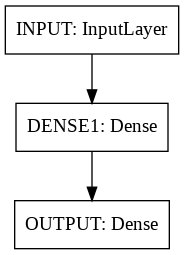

In [6]:
# image model
plot_model(model, to_file='model.png')
Image('model.png')

In [7]:
# fit model
model.fit(x, y, epochs=10, batch_size=10)

Epoch 1/10
768/768 [==============================] - 0s 321us/step - loss: 6.9649 - acc: 0.3971
Epoch 2/10
768/768 [==============================] - 0s 127us/step - loss: 2.9483 - acc: 0.5781
Epoch 3/10
768/768 [==============================] - 0s 126us/step - loss: 1.3735 - acc: 0.6198
Epoch 4/10
768/768 [==============================] - 0s 123us/step - loss: 1.0576 - acc: 0.6628
Epoch 5/10
768/768 [==============================] - 0s 125us/step - loss: 0.9600 - acc: 0.6745
Epoch 6/10
768/768 [==============================] - 0s 132us/step - loss: 0.9091 - acc: 0.6693
Epoch 7/10
768/768 [==============================] - 0s 130us/step - loss: 0.8888 - acc: 0.6589
Epoch 8/10
768/768 [==============================] - 0s 119us/step - loss: 0.8684 - acc: 0.6784
Epoch 9/10
768/768 [==============================] - 0s 127us/step - loss: 0.8222 - acc: 0.6888
Epoch 10/10
768/768 [==============================] - 0s 128us/step - loss: 0.8253 - acc: 0.6628


In [8]:
# evaluate the model
scores = model.evaluate(x, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 65us/step

acc: 65.89%


ref: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ 